## Import Library

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from skimage.io import imread
from skimage.exposure import histogram
from PIL import Image


## Reading the Data

In [16]:
script_dir = os.path.dirname(os.path.abspath('Analysis.ipynb'))
data_path = os.path.join(script_dir, "..", "data", "raw", "dataset")

extract_path = os.path.abspath(data_path)

# Define dataset paths
train_img_path = os.path.join(extract_path, "train/image")
train_mask_path = os.path.join(extract_path, "train/mask")
test_img_path = os.path.join(extract_path, "test/image")
test_mask_path = os.path.join(extract_path, "test/mask")

def list_files(directory):
    return sorted([f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Load dataset
train_images = list_files(train_img_path)
train_masks = list_files(train_mask_path)
test_images = list_files(test_img_path)
test_masks = list_files(test_mask_path)

## EDA

### 1. Dataset Distribution

In [17]:
# Check dataset distribution
print(f"Training Images: {len(train_images)}, Training Masks: {len(train_masks)}")
print(f"Testing Images: {len(test_images)}, Testing Masks: {len(test_masks)}")

Training Images: 500, Training Masks: 500
Testing Images: 100, Testing Masks: 100


### 2. Pixel Intensity

In [ ]:
def load_image(image_path):
    # Open the image using PIL
    img = Image.open(image_path)
    img = img.convert("L") 
    img_array = np.array(img)
    
    return img_array

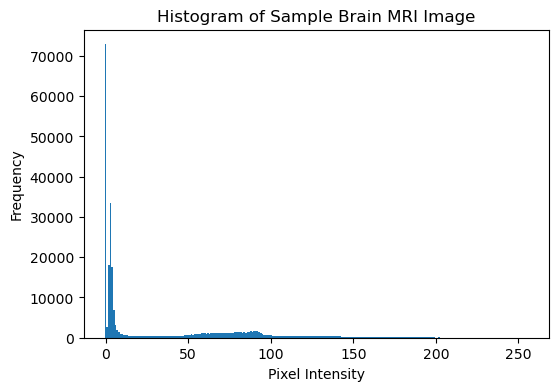

In [ ]:
def plot_histogram(image_path, title):
    img = load_image(image_path)
    hist, bins = histogram(img)
    plt.figure(figsize=(6, 4))
    plt.bar(bins, hist, width=1)
    plt.title(f"Histogram of {title}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Plot histogram for a sample image
sample_img = os.path.join(train_img_path, train_images[0])
plot_histogram(sample_img, "Sample Brain MRI Image")

### 3. MRI and Tumor Image

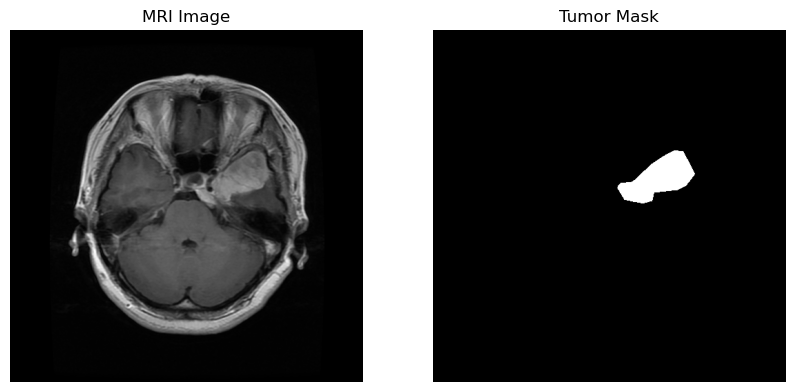

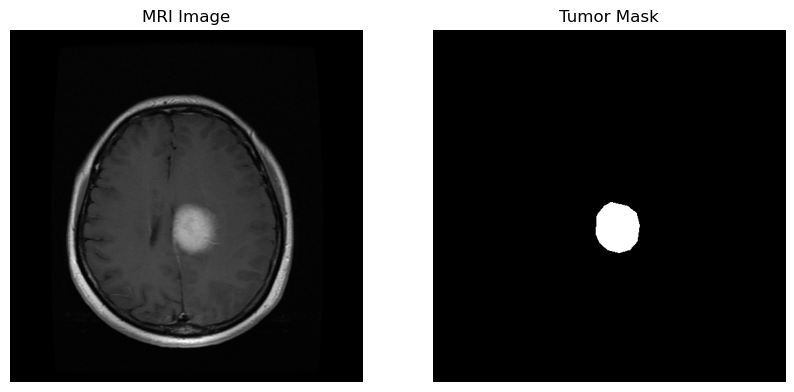

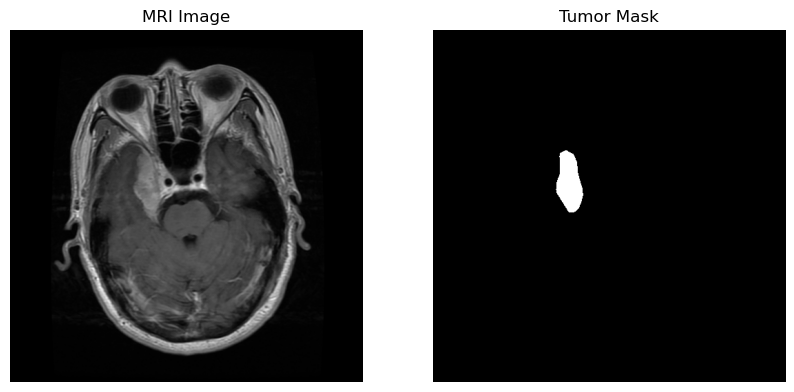

In [20]:
def plot_image_mask(image_name):
    img = load_image(os.path.join(train_img_path, image_name))
    mask = load_image(os.path.join(train_mask_path, image_name))

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title("MRI Image")
    axs[0].axis("off")

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title("Tumor Mask")
    axs[1].axis("off")

    plt.show()

for img_name in train_images[:3]:
    plot_image_mask(img_name)

### 4. Tumor Pixel Intensity

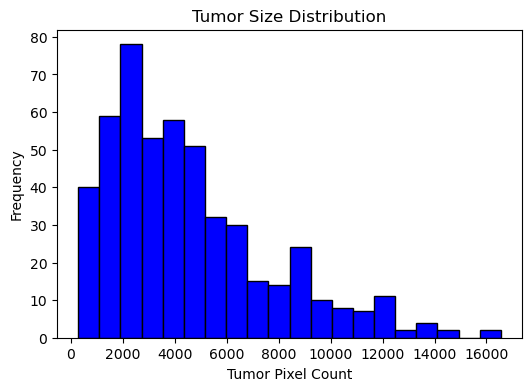

In [21]:
def calculate_tumor_sizes(mask_dir):
    tumor_sizes = []
    for mask_name in list_files(mask_dir):
        mask_path = os.path.join(mask_dir, mask_name)
        mask = load_image(mask_path)
        tumor_size = np.sum(mask > 0)  # Count non-zero pixels
        tumor_sizes.append(tumor_size)
    return tumor_sizes

tumor_sizes = calculate_tumor_sizes(train_mask_path)
plt.figure(figsize=(6, 4))
plt.hist(tumor_sizes, bins=20, color='blue', edgecolor='black')
plt.title("Tumor Size Distribution")
plt.xlabel("Tumor Pixel Count")
plt.ylabel("Frequency")
plt.show()

### 5. Image Size

In [22]:
def analyze_image_sizes(image_dir):
    sizes = []
    for img_name in list_files(image_dir):
        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            sizes.append(img.shape)
    
    size_counts = Counter(sizes)
    print("Image Size Distribution:")
    for size, count in size_counts.items():
        print(f"Size {size}: {count} images")

analyze_image_sizes(train_img_path)


Image Size Distribution:
Size (512, 512): 500 images


### 6. Tumor vs Background Intensity

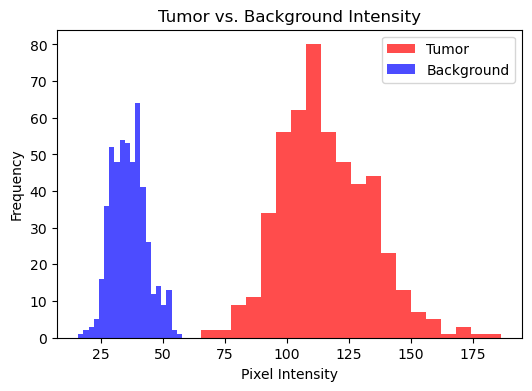

In [23]:
def tumor_vs_background_intensity(image_dir, mask_dir):
    tumor_intensities = []
    background_intensities = []

    for img_name in list_files(image_dir):
        img = load_image(os.path.join(image_dir, img_name))
        mask = load_image(os.path.join(mask_dir, img_name))

        tumor_pixels = img[mask > 0]
        background_pixels = img[mask == 0]

        if len(tumor_pixels) > 0:
            tumor_intensities.append(np.mean(tumor_pixels))
        if len(background_pixels) > 0:
            background_intensities.append(np.mean(background_pixels))

    plt.figure(figsize=(6, 4))
    plt.hist(tumor_intensities, bins=20, alpha=0.7, label="Tumor", color='red')
    plt.hist(background_intensities, bins=20, alpha=0.7, label="Background", color='blue')
    plt.title("Tumor vs. Background Intensity")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

tumor_vs_background_intensity(train_img_path, train_mask_path)
